# Customers_Segmentation

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will specify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams["figure.figsize"] = (7,4)
#plt.rcParams['axes.grid'] = False

import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [389]:
df = pd.read_csv('Mall_Customers.csv')
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
183,184,Female,29,98,88
83,84,Female,46,54,44
88,89,Female,34,58,60
34,35,Female,49,33,14
134,135,Male,20,73,5


#### Explore Data

You can rename columns to more usable, if you need.

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [391]:
df.duplicated().sum()

0

In [392]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [393]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [394]:
df.columns = ['customer_id', 'gender', 'age', 'annual_income',
       'spending_score']

In [395]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [396]:
df.gender.value_counts()

gender
Female    112
Male       88
Name: count, dtype: int64

<Axes: >

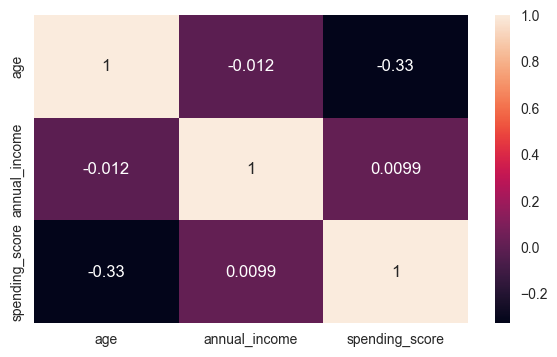

In [397]:
sns.heatmap(df[['age', 'annual_income','spending_score']].corr(), annot=True)

In [398]:
df.drop('customer_id', axis=1, inplace=True)

<Axes: >

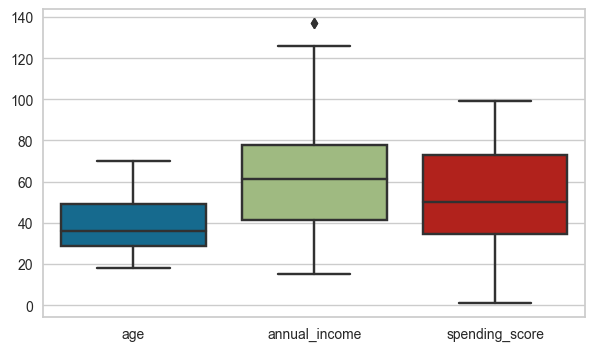

In [399]:
sns.boxplot(df)

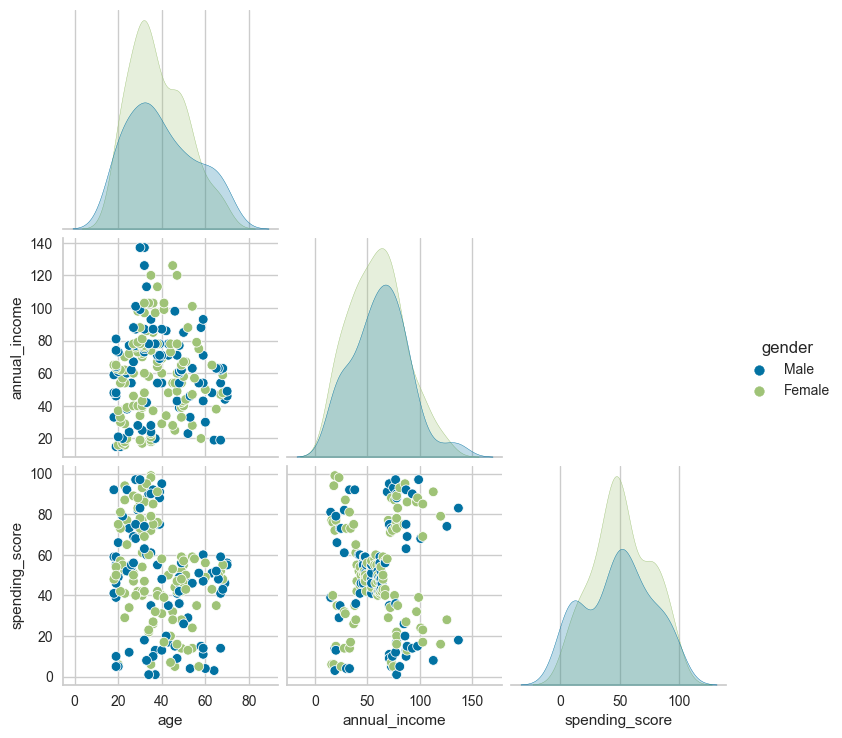

In [400]:
sns.pairplot(df, corner=True, hue='gender')
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [401]:
X1 = df[['age','spending_score']]
X1

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


#### *ii. Determine optimal number of clusters*

In [402]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X = X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [403]:
hopkins(X1, 0.5)

0.7269772709300226

In [404]:
result=[]
for _ in range(10):
    result.append(hopkins(X1, 1))
np.mean(result)

0.6977065273312896

In [405]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [406]:
result = []
for _ in range(10):
    result.append(hopkins(MinMaxScaler().fit_transform(X1), 1))
np.mean(result)

0.6900722887174358

In [407]:
result = []
for _ in range(10):
    result.append(hopkins(StandardScaler().fit_transform(X1), 1))
np.mean(result)

0.6831932009919424

In [408]:
X1

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


### Why silhouette_score is negative?

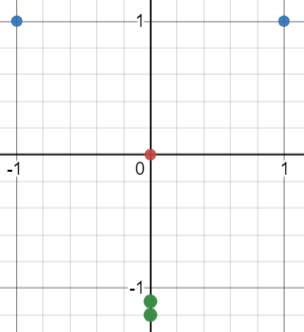

#### *iii. Apply K Means*

In [409]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=4, 
                       random_state=42)

In [410]:
K_means_model.fit(X1)

KMeans(n_clusters=4, random_state=42)

In [411]:
K_means_model.predict(X1)

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [412]:
### Inertia

In [413]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, 
                   random_state=42)
    model.fit(X1)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

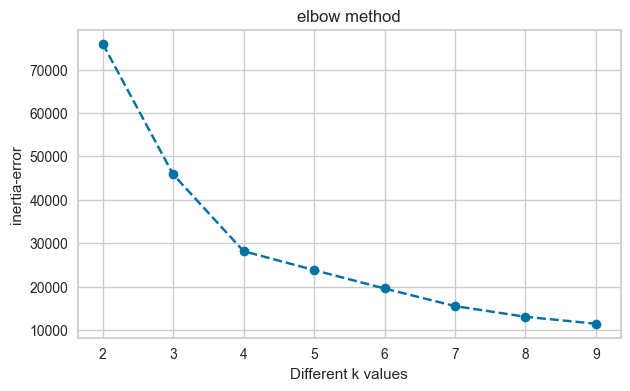

In [414]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [415]:
### Distortion

In [416]:
K=range(2,10)
distortion=[]
for k in K:
    kmeanModel = KMeans(n_clusters=k,
                        random_state=42)
    kmeanModel.fit(X1)

    distances = kmeanModel.transform(X1) 
    labels_ = kmeanModel.labels_ 

    result = []
    for i in range(k):
        cluster_distances = distances[labels_== i, i] 
        result.append(np.mean(cluster_distances**2))
    distortion.append(sum(result))

Text(0.5, 1.0, 'Elbow Method')

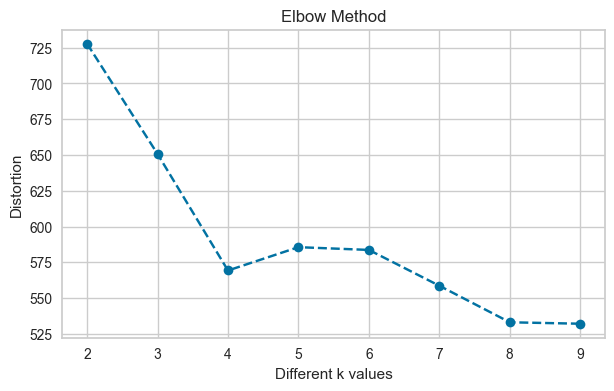

In [417]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("Distortion") 
plt.title("Elbow Method")

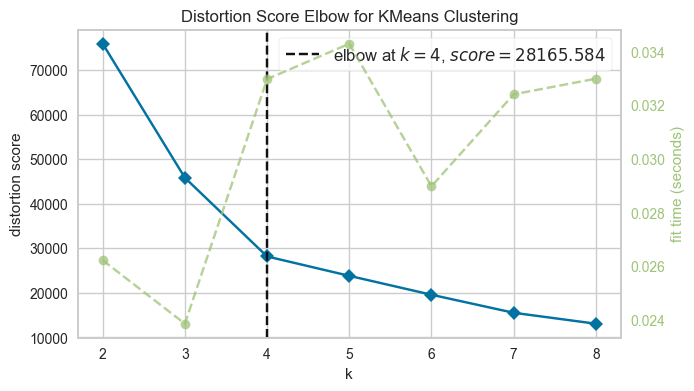

In [418]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X1)        # Fit the data to the visualizer
visualizer.show();

### Silhouette Analysis

In [419]:
from sklearn.metrics import silhouette_score

In [420]:
K_means_model.labels_

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [421]:
silhouette_score(X1, K_means_model.labels_)

0.49973941540141753

In [422]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, 
                    random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.44526667994351227
For n_clusters=6, the silhouette score is 0.44845919861907363
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.4280182657184854


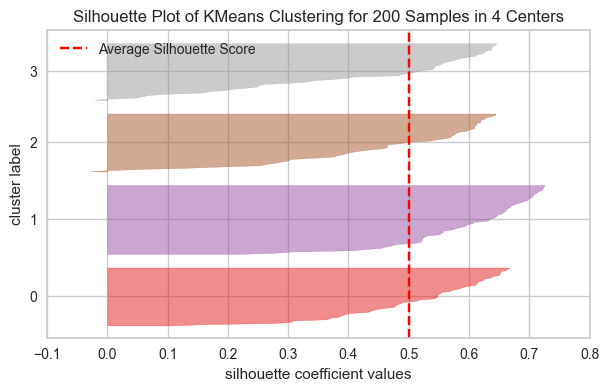

In [423]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model2 = KMeans(n_clusters=4, 
                random_state=42)          
visualizer = SilhouetteVisualizer(model2)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

In [424]:
for i in range(model2.n_clusters):
    label = (model2.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.5960779476836082
mean silhouette score for label 2    : 0.45429047261675404
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


#### *iv. Visualizing and Labeling All the Clusters*

In [425]:
K_means_model.labels_

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [426]:
clusters = K_means_model.labels_
df1 = X1.copy()
df1["Kmeans_clusters"] = clusters
df1

,age,spending_score,Kmeans_clusters
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


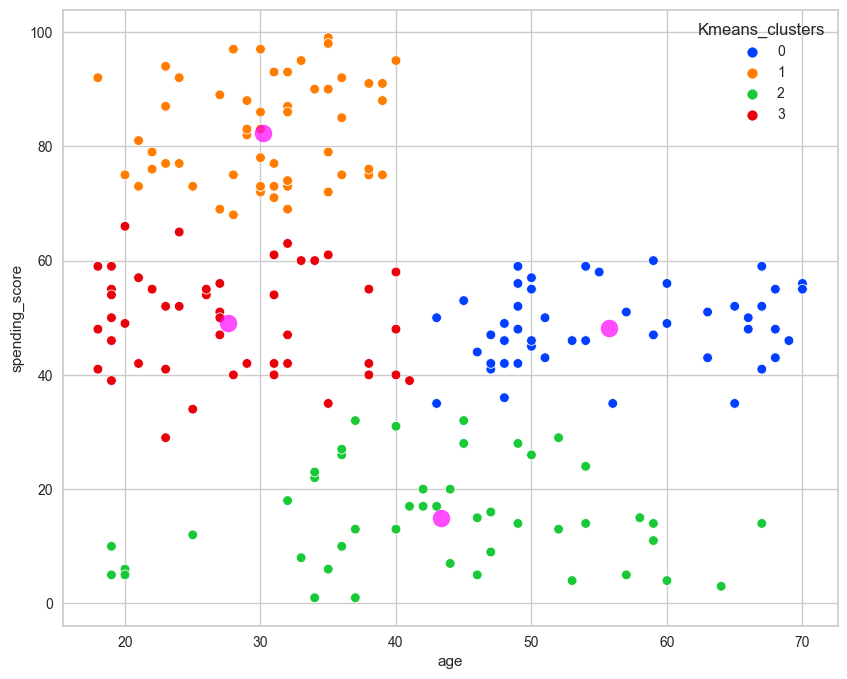

In [427]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='age',y='spending_score', hue = 'Kmeans_clusters',data=df1,palette='bright')
centers= K_means_model.cluster_centers_


plt.scatter(centers[:,0],centers[:,1],c='magenta',s=150,alpha=0.7)

In [428]:
#!pip install pyclustertend, it works only with Python 3.8, 3.9 (13/11/2023)

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [429]:
X2 = df[['annual_income','spending_score']]
X2

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### *ii. Determine optimal number of clusters*

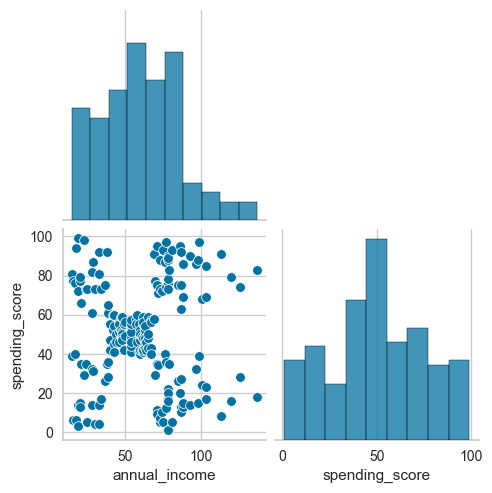

In [430]:
sns.pairplot(X2,corner=True);

In [431]:
hopkins(X2,1)

0.702099394048374

In [432]:
result=[]
for _ in range(10):
    result.append(hopkins(X2, 1))
np.mean(result)

0.705472904978121

In [433]:
result = []
for _ in range(10):
    result.append(hopkins(StandardScaler().fit_transform(X2), 1))
np.mean(result)

0.6986727280082445

#### *iii. Apply K Means*

In [434]:
K_means_model = KMeans(n_clusters=5, 
                       random_state=42)

In [435]:
K_means_model.fit(X2)

KMeans(n_clusters=5, random_state=42)

In [436]:
K_means_model.predict(X2)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

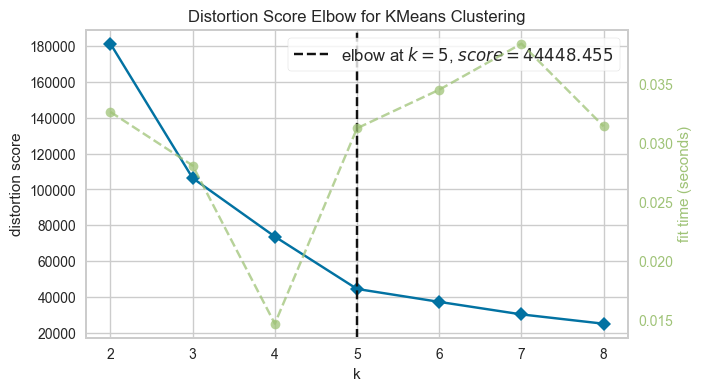

In [437]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

In [438]:
silhouette_score(X2, K_means_model.labels_)

0.553931997444648

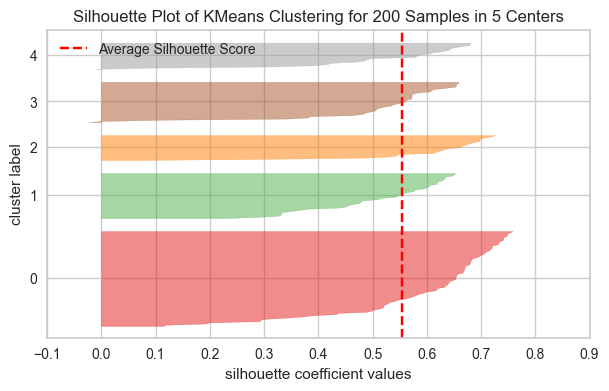

In [439]:
model2 = KMeans(n_clusters=5, 
                random_state=42)          
visualizer = SilhouetteVisualizer(model2)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

#### *iv. Visualizing and Labeling All the Clusters*

In [440]:
df2 = X2.copy()
clusters = K_means_model.labels_
df2["Kmeans_clusters"] = clusters
df2

,annual_income,spending_score,Kmeans_clusters
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


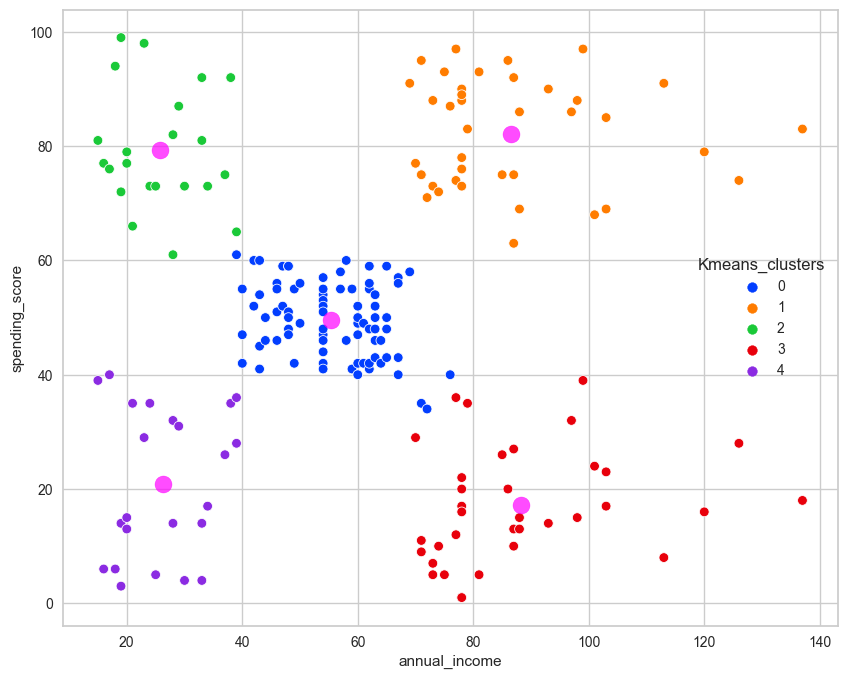

In [441]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='annual_income',y='spending_score', hue = 'Kmeans_clusters',data=df2,palette='bright')
centers= K_means_model.cluster_centers_


plt.scatter(centers[:,0],centers[:,1],c='magenta',s=150,alpha=0.7)

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [442]:
X1

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [443]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [444]:
hc_ward = linkage(y=X1, method="ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

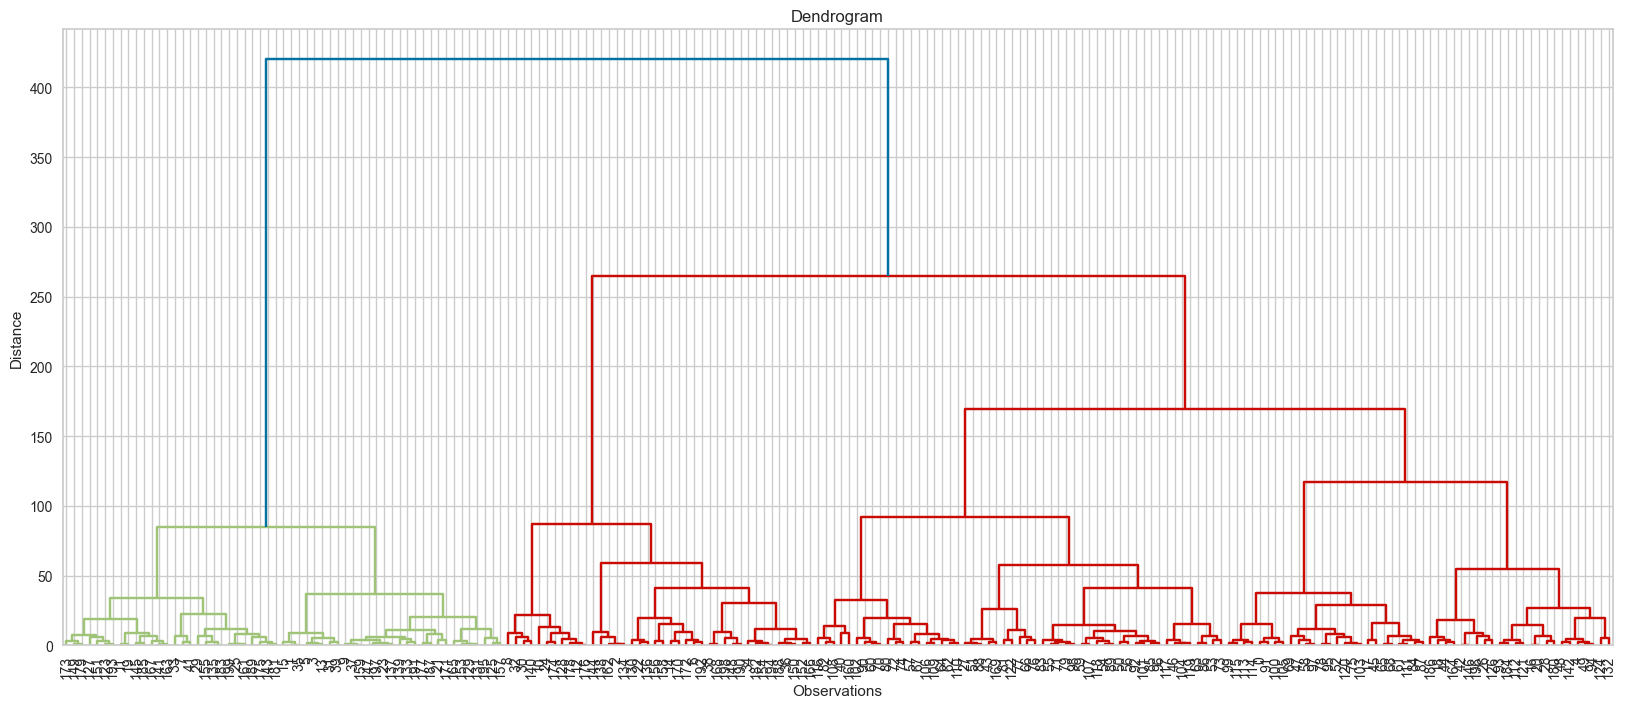

In [445]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

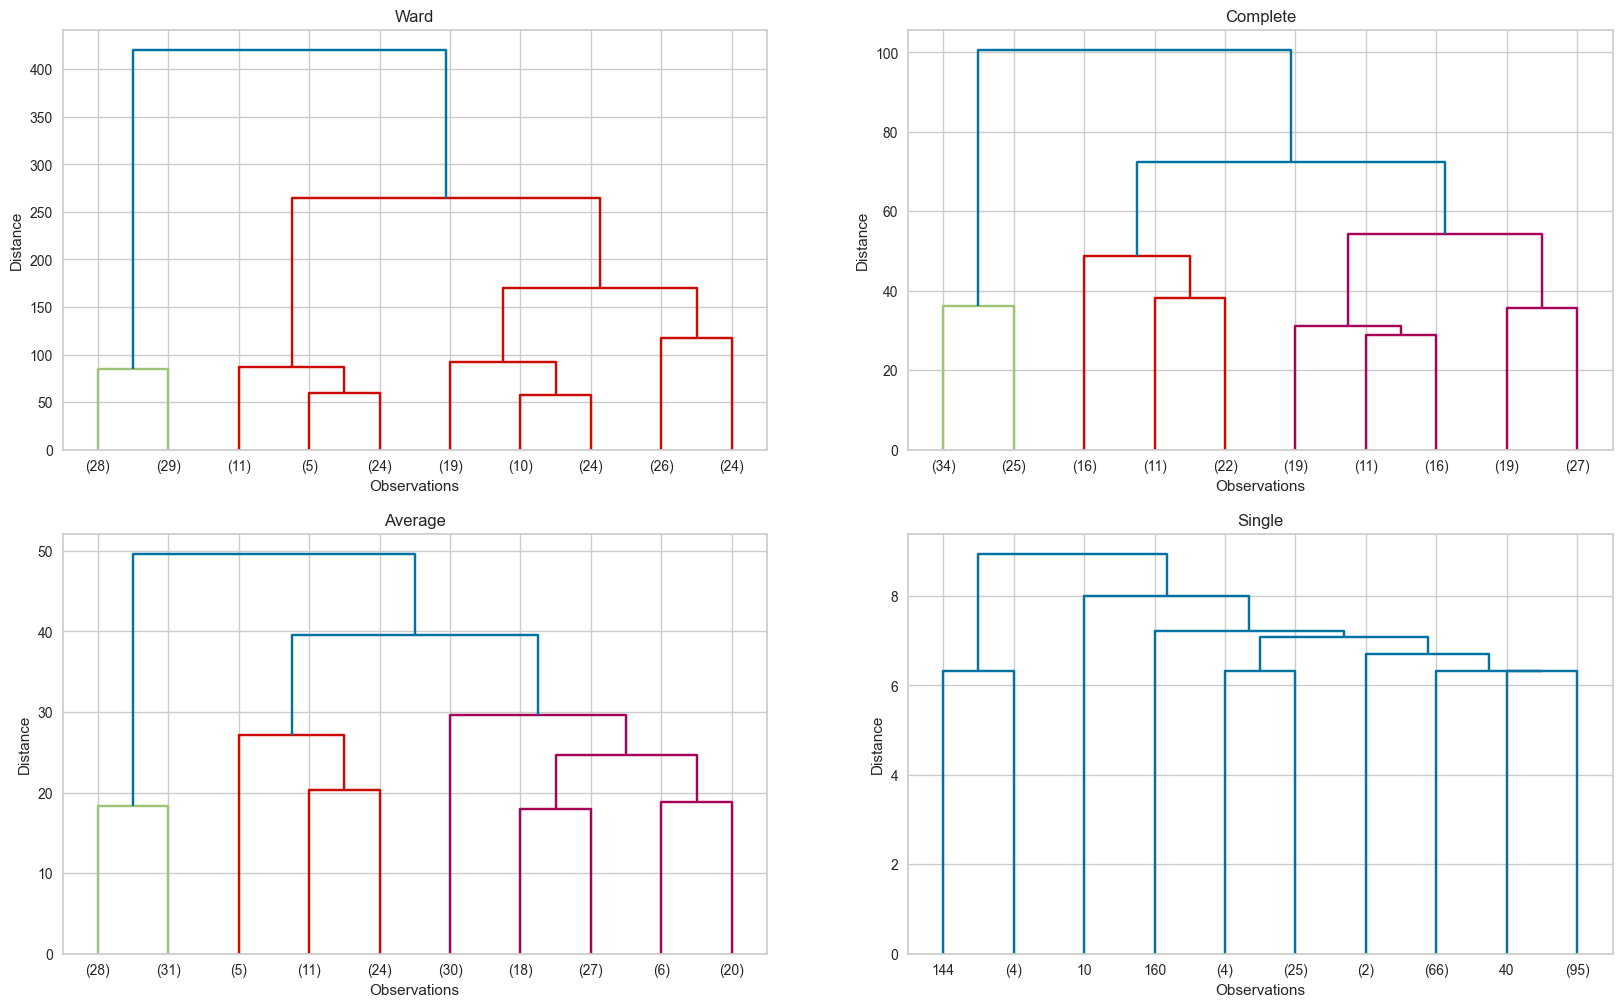

In [446]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [447]:
from sklearn.cluster import AgglomerativeClustering

In [448]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091


## Clustering based on Annual Income and Spending Score- x2

In [449]:
X2

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [450]:
X1

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [451]:
Agg1 = AgglomerativeClustering(n_clusters=4, 
                               metric='euclidean', 
                               linkage='ward')
y_agg= Agg1.fit_predict(X1)    

In [452]:
df1['cluster_agg'] = y_agg
df1

,age,spending_score,Kmeans_clusters,cluster_agg
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0
...,...,...,...,...
195,35,79,1,3
196,45,28,2,0
197,32,74,1,3
198,32,18,2,2


#### Annual Income and Spending Score- x2

In [453]:
X2

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [454]:
Agg2 = AgglomerativeClustering(n_clusters=5, 
                               linkage='ward',
                               metric='euclidean')
y_agg2 = Agg2.fit_predict(X2)

In [455]:
df2['cluster_agg'] = y_agg2
df2

,annual_income,spending_score,Kmeans_clusters,cluster_agg
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,1,2
196,126,28,3,0
197,126,74,1,2
198,137,18,3,0


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

<Axes: xlabel='age', ylabel='spending_score'>

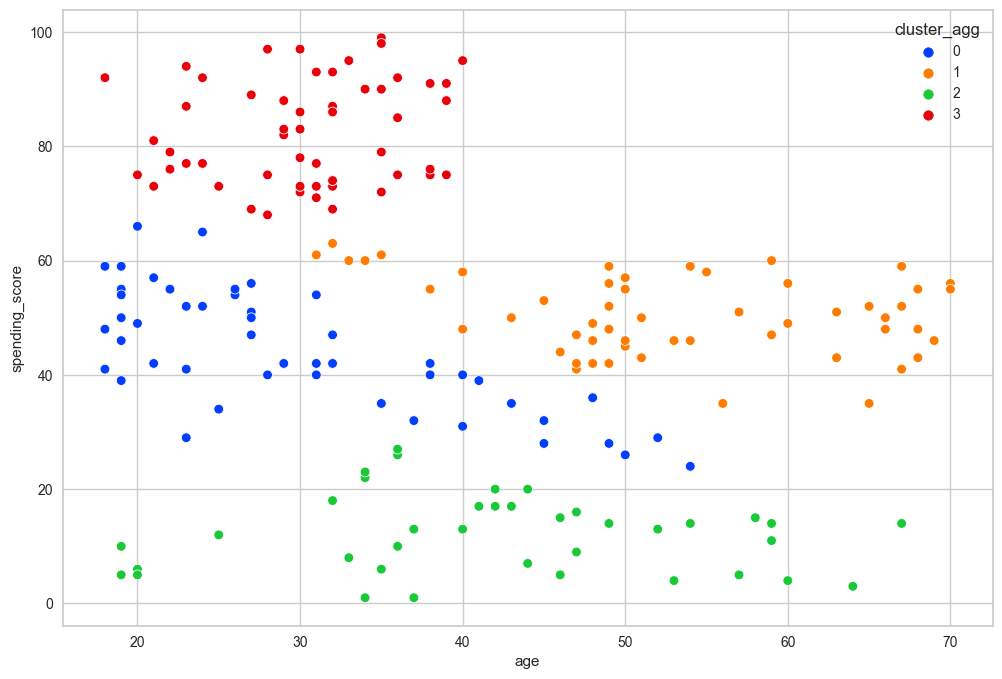

In [456]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='age',y='spending_score',hue='cluster_agg',data=df1,palette='bright')

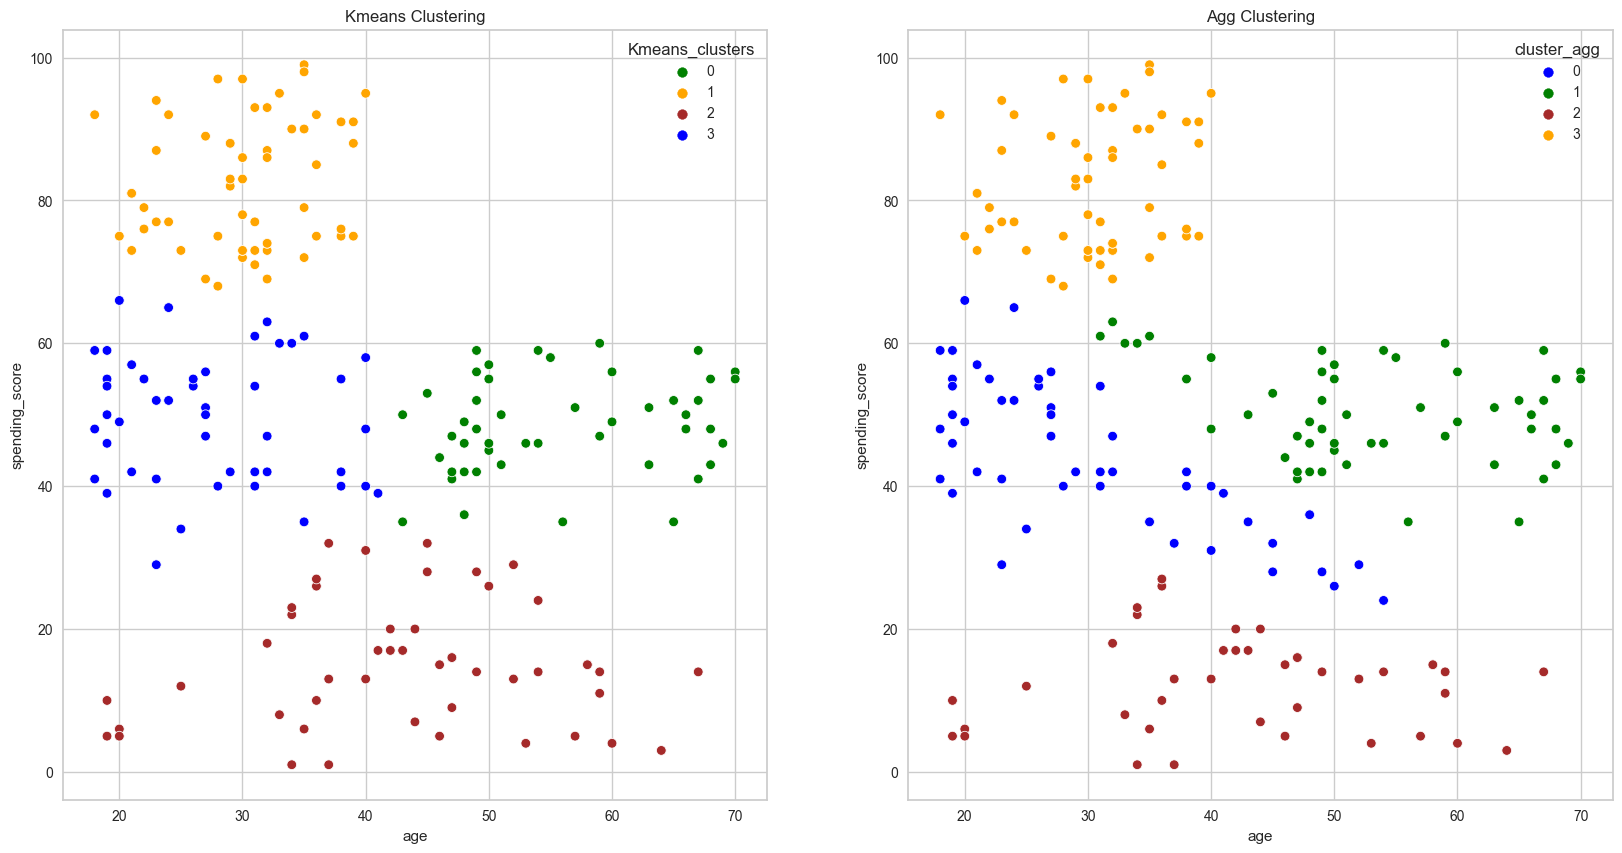

In [459]:
plt.figure(figsize=(20,10))

plt.subplot(121)
sns.scatterplot(x='age',y='spending_score',hue='Kmeans_clusters',data=df1,
                palette=['green','orange','brown','blue'])
plt.title('Kmeans Clustering')

plt.subplot(122)
sns.scatterplot(x='age',y='spending_score',hue='cluster_agg',data=df1,
                palette=['blue','green', 'brown', 'orange'])
plt.title('Agg Clustering');


#### Annual Income and Spending Score- x2

In [460]:
df2

,annual_income,spending_score,Kmeans_clusters,cluster_agg
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,1,2
196,126,28,3,0
197,126,74,1,2
198,137,18,3,0


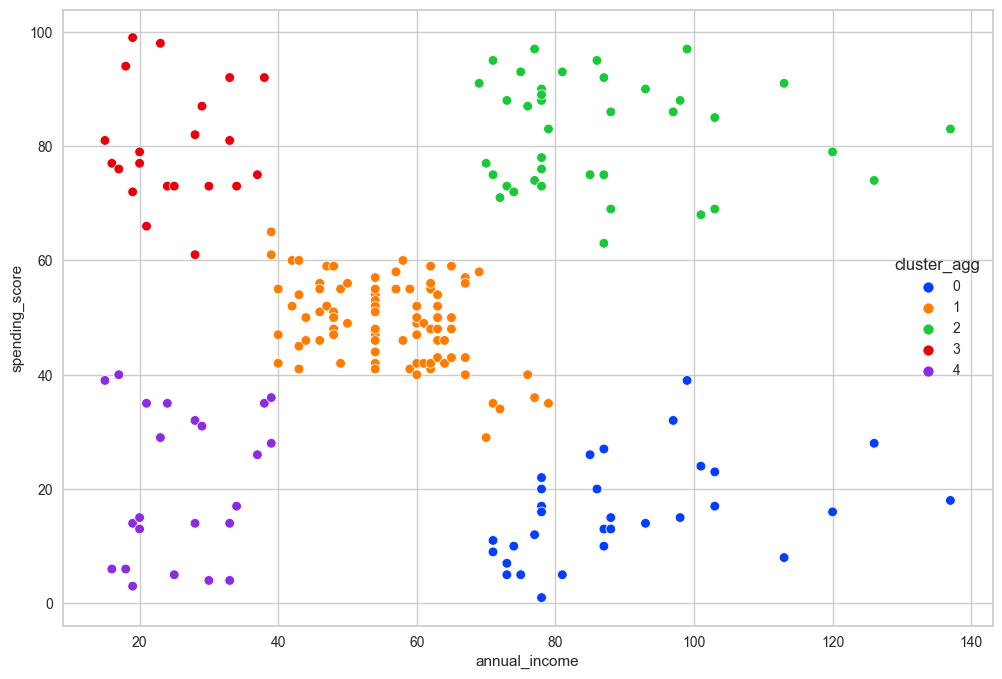

In [462]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='annual_income',y='spending_score',hue='cluster_agg',data=df2,palette="bright");

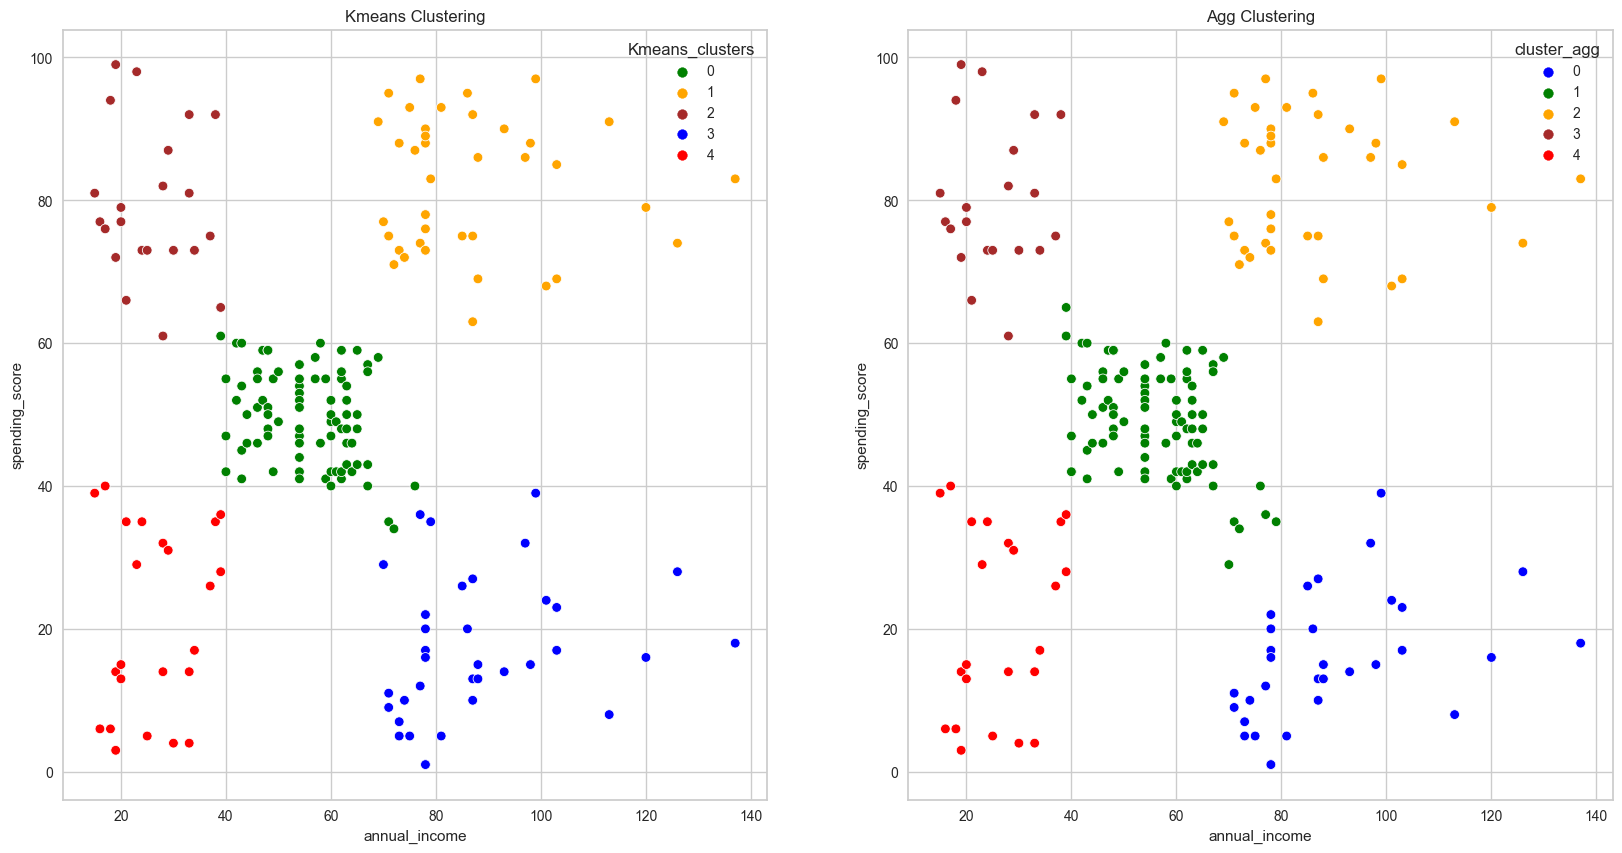

In [463]:
plt.figure(figsize=(20,10))

plt.subplot(121)
sns.scatterplot(x='annual_income',y='spending_score',hue='Kmeans_clusters',data=df2,
                palette=['green', 'orange', 'brown','blue','red'])
plt.title('Kmeans Clustering')

plt.subplot(122)
sns.scatterplot(x='annual_income',y='spending_score',hue='cluster_agg',data=df2,
                palette=['blue', 'green', 'orange', 'brown','red'])
plt.title('Agg Clustering');

#### Interpretation based on Age and Spending Score- x1

In [464]:
df1.Kmeans_clusters.value_counts()

Kmeans_clusters
1    57
2    48
0    48
3    47
Name: count, dtype: int64

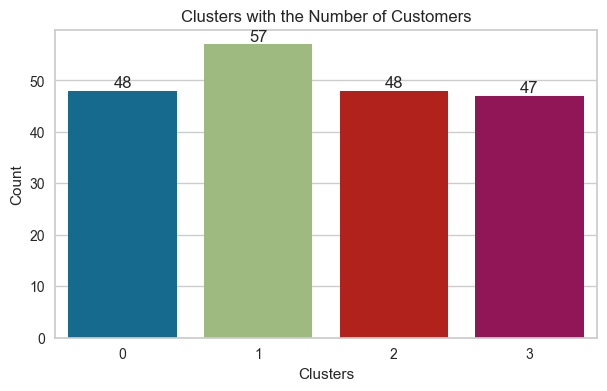

In [468]:
ax = sns.barplot(x=df1.Kmeans_clusters.value_counts().index, y=df1.Kmeans_clusters.value_counts())
plt.title("Clusters with the Number of Customers")
plt.xlabel("Clusters")
plt.ylabel("Count")
ax.bar_label(ax.containers[0]);

In [469]:
df["cluster_age_spending_score"] = df1.Kmeans_clusters
df.head()

,gender,age,annual_income,spending_score,cluster_age_spending_score
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,3


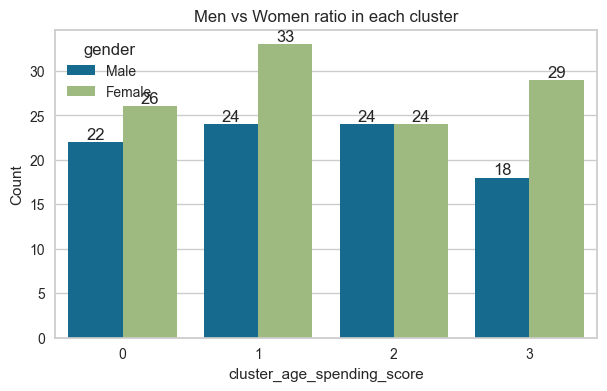

In [487]:
ax = sns.countplot(x=df.cluster_age_spending_score,hue=df.gender)
plt.title("Men vs Women ratio in each cluster")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container)

In [491]:
df.select_dtypes("number").groupby("cluster_age_spending_score").mean()

,age,annual_income,spending_score
cluster_age_spending_score,,,
0,55.708333,54.770833,48.229167
1,30.175439,66.070175,82.350877
2,43.291667,66.937500,15.020833
3,27.617021,53.276596,49.148936


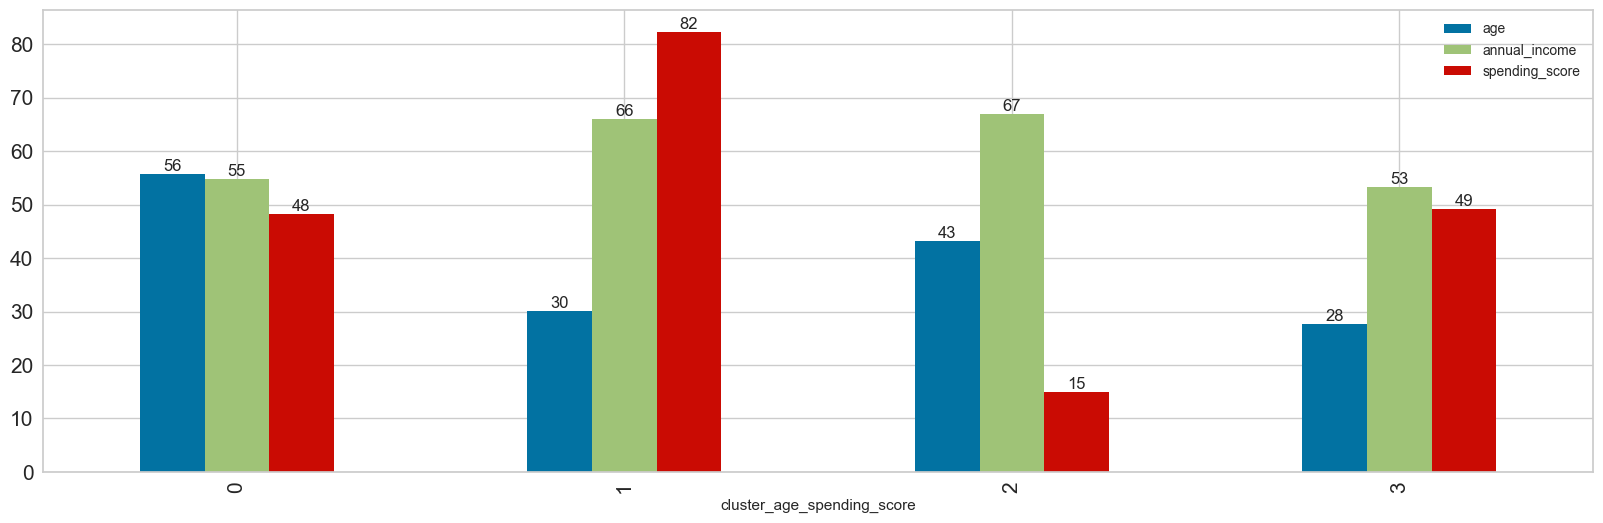

In [492]:
ax = df.select_dtypes("number").groupby("cluster_age_spending_score").mean().plot(kind='bar', 
                                                                                  figsize = (20,6),
                                                                                  fontsize=15)
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [493]:
df2

,annual_income,spending_score,Kmeans_clusters,cluster_agg
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,1,2
196,126,28,3,0
197,126,74,1,2
198,137,18,3,0


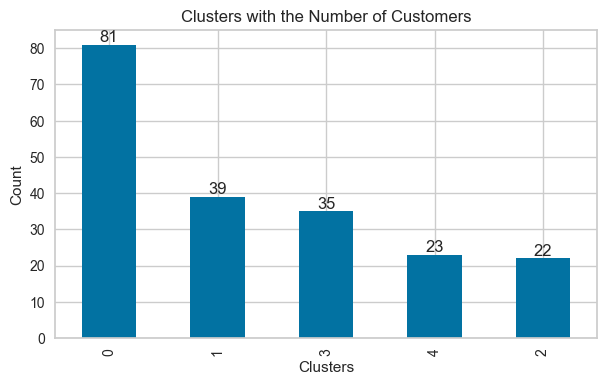

In [495]:
ax = df2.Kmeans_clusters.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.title("Clusters with the Number of Customers")
plt.xlabel("Clusters")
plt.ylabel("Count");

In [496]:
df.drop(columns= "cluster_age_spending_score", inplace=True)

In [499]:
df["cluster_annual_income_spending_score"] = df2.Kmeans_clusters
df

,gender,age,annual_income,spending_score,cluster_annual_income_spending_score
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,3
197,Male,32,126,74,1
198,Male,32,137,18,3


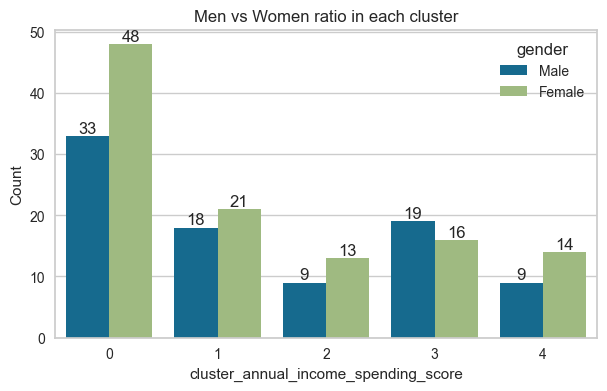

In [500]:
ax = sns.countplot(x=df.cluster_annual_income_spending_score, hue=df.gender)
plt.title("Men vs Women ratio in each cluster")
plt.ylabel("Count")
for container in ax.containers:
    ax.bar_label(container)

In [501]:
df.groupby(["gender", "cluster_annual_income_spending_score"]).mean()

age  annual_income  \
gender cluster_annual_income_spending_score                             
Female 0                                     40.895833      55.354167   
       1                                     32.190476      86.047619   
       2                                     25.461538      25.692308   
       3                                     43.250000      90.937500   
       4                                     43.214286      27.357143   
Male   0                                     45.363636      55.212121   
       1                                     33.277778      87.111111   
       2                                     25.000000      25.777778   
       3                                     39.315789      85.894737   
       4                                     48.333333      24.666667   

                                             spending_score  
gender cluster_annual_income_spending_score                  
Female 0                                          49.000000  
       1                                          81.666667  
       2                                          80.538462  
       3                                          22.062500  
       4                                          21.714286  
Male   0                                          50.272727  
       1                                          82.666667  
       2                                          77.666667  
       3                                          12.947368  
       4                                          19.666667

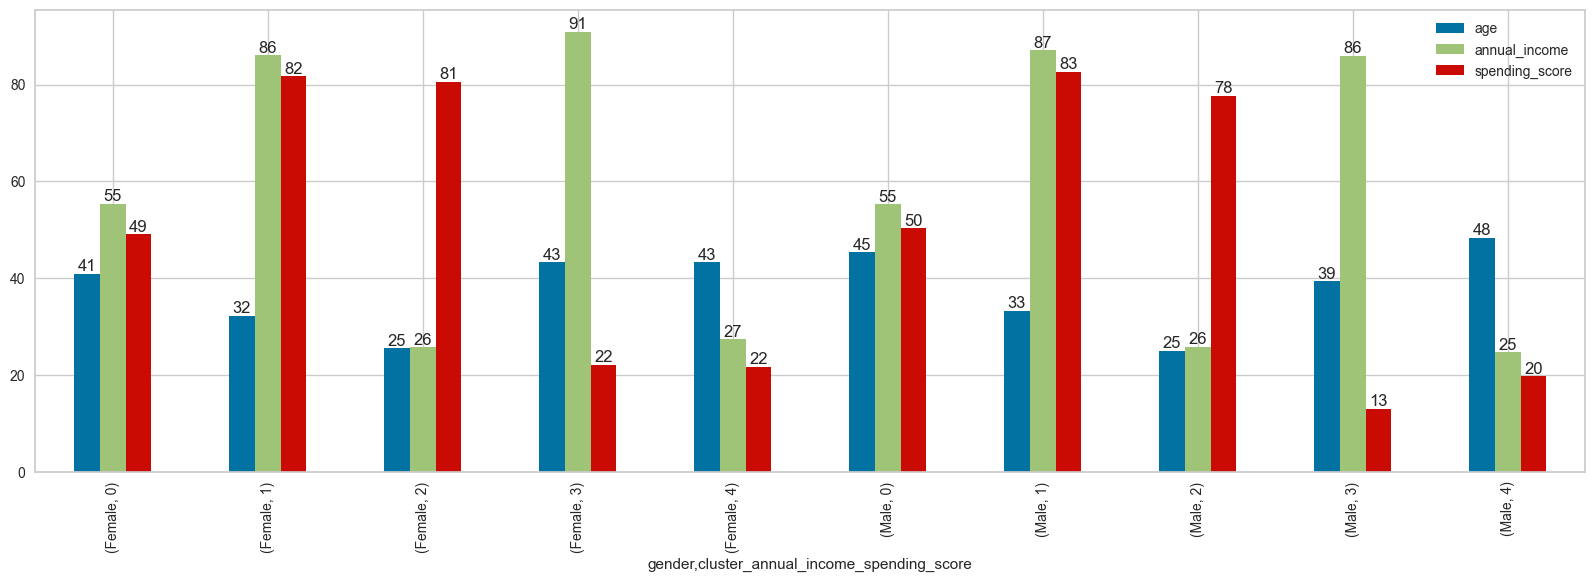

In [502]:
ax = df.groupby(["gender", "cluster_annual_income_spending_score"]).mean().plot(kind="bar", figsize=(20,6))
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

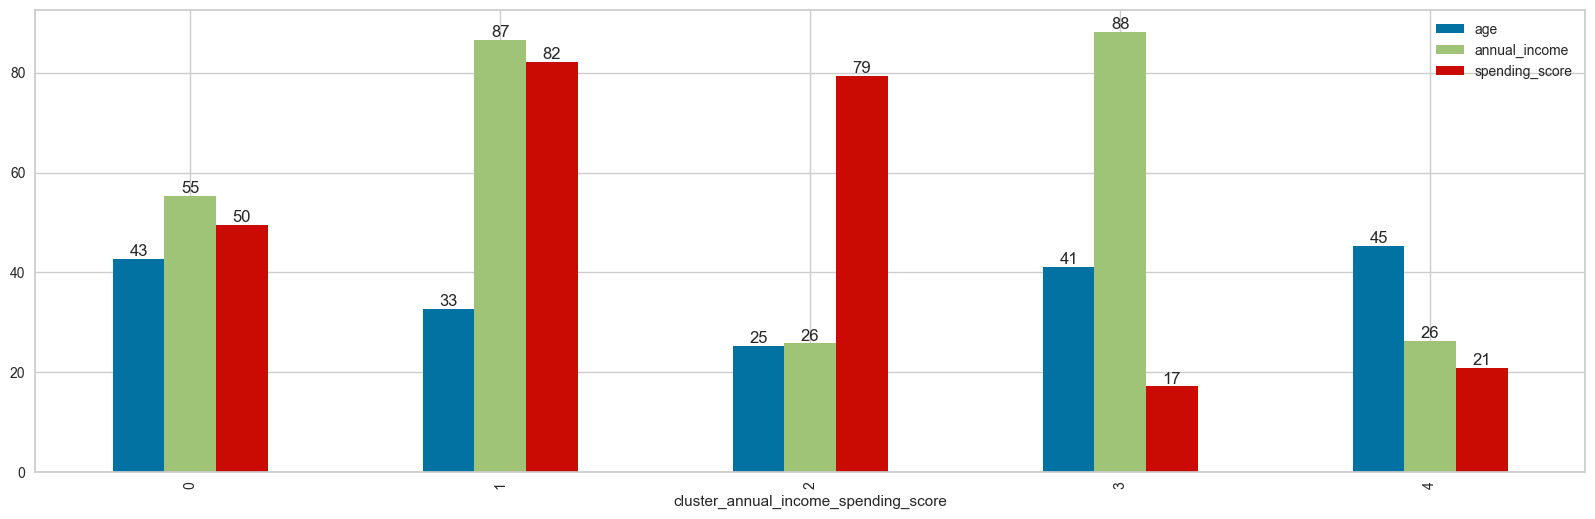

In [503]:
ax = df.select_dtypes("number").groupby("cluster_annual_income_spending_score").mean().plot(kind='bar', figsize = (20,6))
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.